In [9]:
# %% Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
# Set maximum rows
pd.set_option('display.max_rows', 100)  

# Set maximum columns
pd.set_option('display.max_columns', 200)  

ModuleNotFoundError: No module named 'sweetviz'


 ## Importing Data

In [10]:
import sys
print(sys.executable)

/Users/siddharthshankar/anaconda3/envs/dashboard_env/bin/python


In [ ]:
# %%

day_data = pd.read_csv('../data/day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600




 ## Data Structure

In [ ]:
# %%

print(type(day_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# %%

day_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
# %%

day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# %%

day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# %%

day_data.describe(include='object')

,dteday
count,730
unique,730
top,01-01-2018
freq,1



 ## Missing Values

In [ ]:
# %%

day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



 **There are no missing values in the dataset.**



 ## Data Quality Checks

In [ ]:
# %%

# Check for duplicate rows
print("Number of duplicate rows:", day_data.duplicated().sum())

# Verify unique values for categorical variables
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    print(f"Unique values in {col}: {day_data[col].unique()}")

Number of duplicate rows: 0
Unique values in season: [1 2 3 4]
Unique values in yr: [0 1]
Unique values in mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in holiday: [0 1]
Unique values in weekday: [6 0 1 2 3 4 5]
Unique values in workingday: [0 1]
Unique values in weathersit: [2 1 3]




 ## Handling Categorical Variables

In [ ]:
# %%

# Convert categorical variables to appropriate formats
day_data['season'] = day_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
day_data['weathersit'] = day_data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'})
day_data['yr'] = day_data['yr'].map({0: 2018, 1: 2019})

# Create dummy variables for categorical columns
day_data = pd.get_dummies(day_data, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)



 ## Box Plots for Continuous Variables

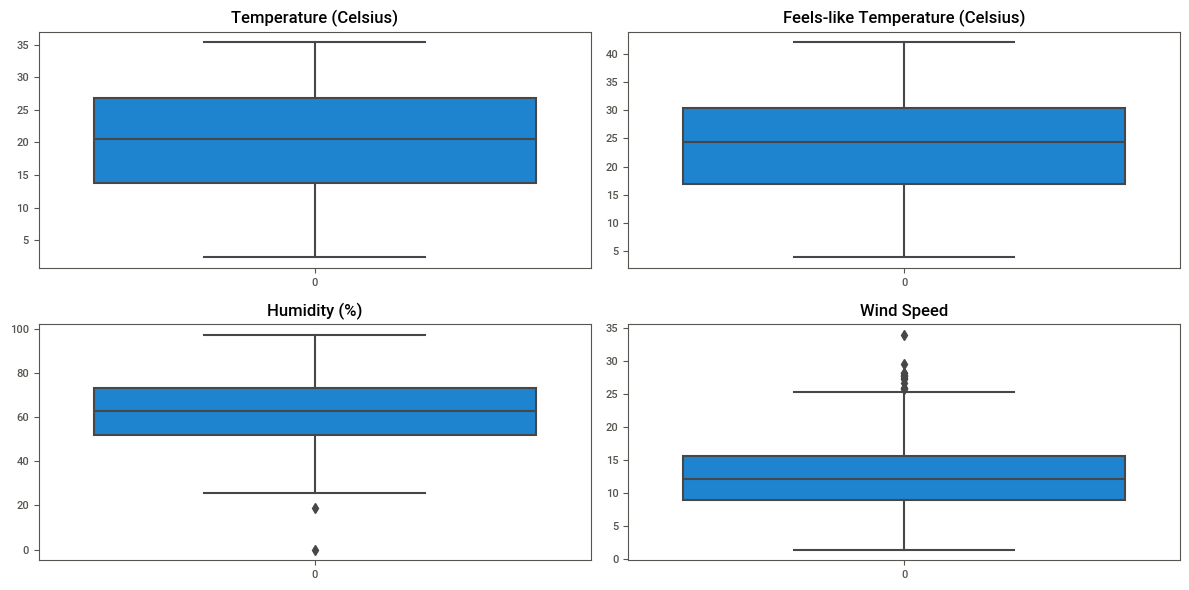

In [ ]:
# %%

# Setting up the matplotlib figure
plt.figure(figsize=(12, 6))

# Creating subplots for each variable
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.boxplot(data=day_data['temp'])
plt.title('Temperature (Celsius)')

plt.subplot(2, 2, 2)  # 2nd subplot
sns.boxplot(data=day_data['atemp'])
plt.title('Feels-like Temperature (Celsius)')

plt.subplot(2, 2, 3)  # 3rd subplot
sns.boxplot(data=day_data['hum'])
plt.title('Humidity (%)')

plt.subplot(2, 2, 4)  # 4th subplot
sns.boxplot(data=day_data['windspeed'])
plt.title('Wind Speed')

plt.tight_layout()  # Adjusts plot parameters to give specified padding
plt.show()



 **There are no outliers in the 'Tempeture' and 'Feels-like Temperature' columns. However, there are some outliers in the 'Humidity' and 'Wind Speed' columns.**
 **The IQR for temperature lies between 15 and 25 degree celcius, the lowest temperature is close to 0. Majority of the temperature is pleasent. There is no major difference with 'Feels like Temperature**
 **Moderately humid climate. Some days get very dry.**
 **Wind Speed seems to have outlier on the opposite end (higer end)**


 ## Descriptive Statistics

In [ ]:
# %%

day_data[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021




 ## Observations and Insights
	1.	Temperature and Feels-like Temperature:
		- The mean feels-like temperature is higher than the actual temperature, indicating that perceived temperatures are generally warmer.
		- The distribution of both temperature and feels-like temperature is similar, but feels-like temperature shows slightly higher variability.
	2.	Humidity:
		- Humidity shows significant variability, with values ranging from 0% to 97.25%.
		- The median humidity is 62.63%, which aligns closely with the mean, suggesting a relatively symmetric distribution.
	3.	Wind Speed:
		- Wind speed shows considerable variability, with values ranging from 1.50 units to 34.00 units.
		- The distribution is skewed towards lower values, as indicated by the median being closer to the lower quartile than the upper quartile.

/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Temperature (Celsius)')

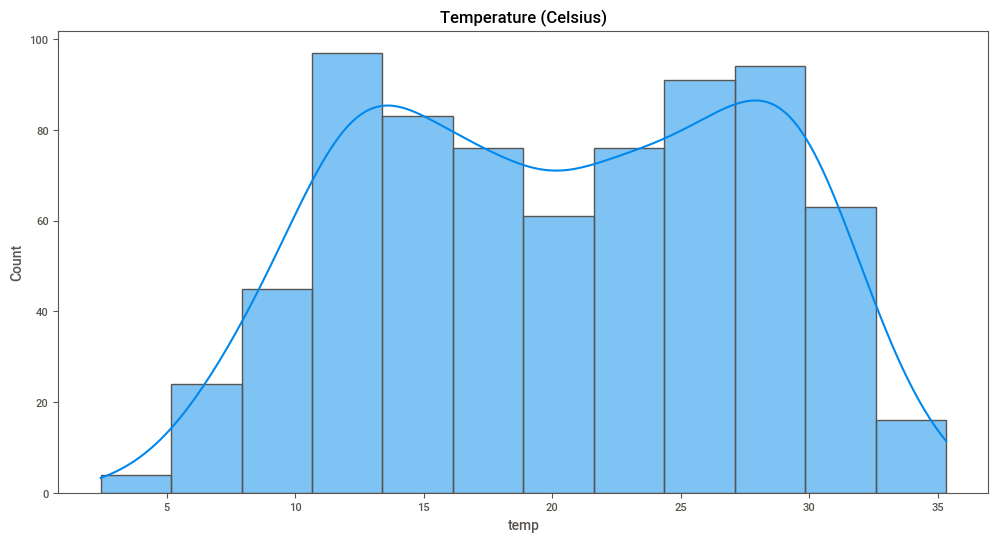

In [ ]:
# %%

plt.figure(figsize=(12, 6)) 
sns.histplot(data=day_data['temp'], kde=True)
plt.title('Temperature (Celsius)')



 ## Weather Situation Analysis

In [ ]:
# %%

day_data.groupby('weathersit_mist')['temp'].mean()
day_data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_mist,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,01-01-2018,2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,02-01-2018,2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,03-01-2018,2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,4,04-01-2018,2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,5,05-01-2018,2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


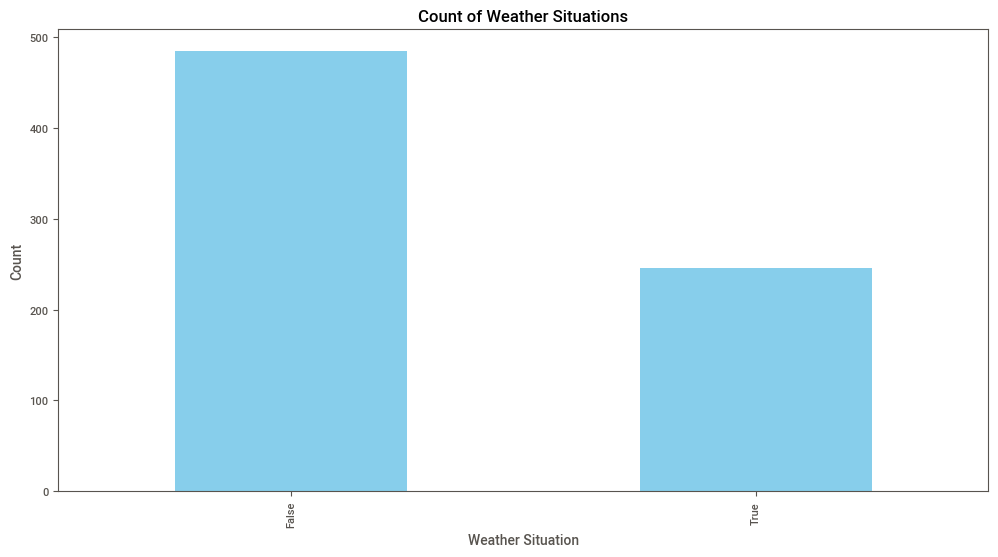

In [ ]:
# %%

plt.figure(figsize=(12, 6))
day_data.groupby('weathersit_mist').size().plot(kind='bar', color='skyblue')
plt.title('Count of Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()

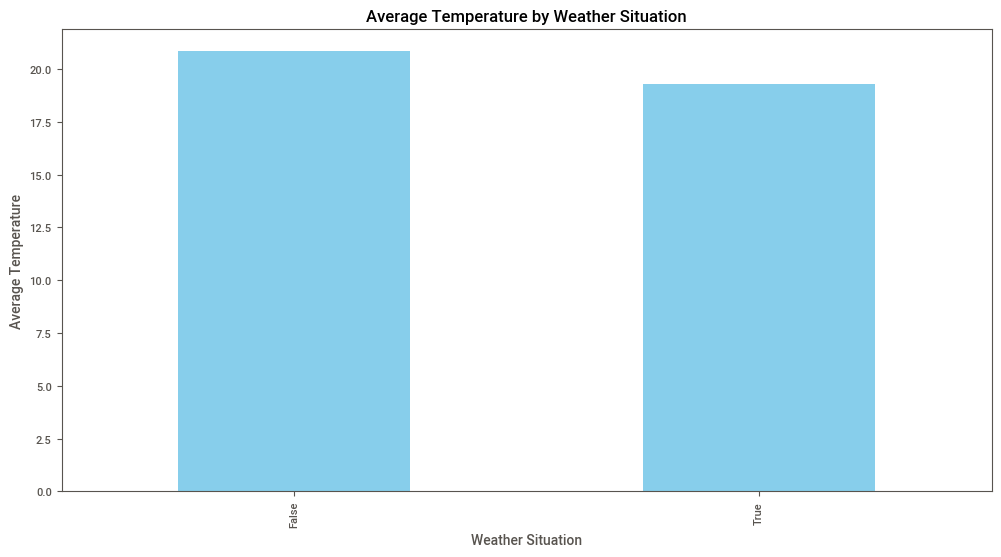

In [ ]:
# %%

plt.figure(figsize=(12, 6))
day_data.groupby('weathersit_mist')['temp'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Temperature')
plt.show()

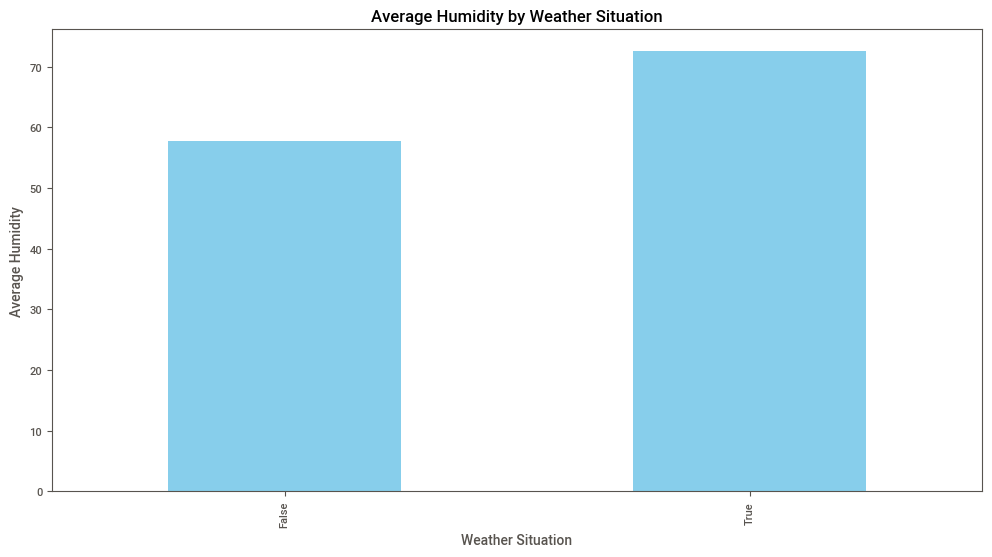

In [ ]:
# %%

plt.figure(figsize=(12, 6))
day_data.groupby('weathersit_mist')['hum'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Humidity by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Humidity')
plt.show()

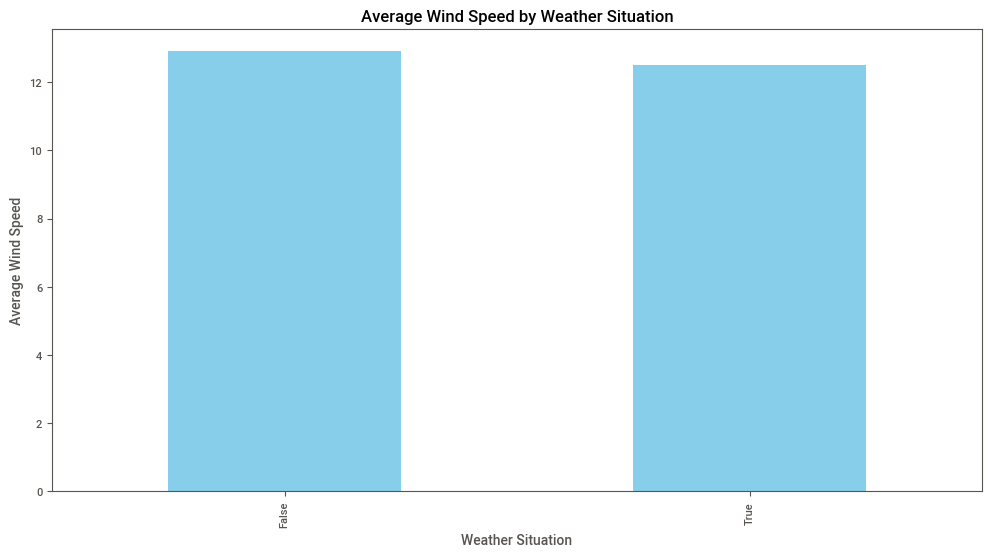

In [ ]:
# %%

plt.figure(figsize=(12, 6))
day_data.groupby('weathersit_mist')['windspeed'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Wind Speed by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Wind Speed')
plt.show()


 ## Data Profiling Report using Sweetviz

In [ ]:
# %%

# Generate a sweetviz report
report = sv.analyze(day_data)
report.show_html('Day_Data_Report.html')  # Save the report as an HTML file and open in the browser

                                             |          | [  0%]   00:00 -> (? left)

Report Day_Data_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



 ## Season Analysis

In [ ]:
# %%

day_data['season_spring'].value_counts()

season_spring
False    550
True     180
Name: count, dtype: int64


 ## Weather Situation Analysis

In [ ]:
# %%

day_data['weathersit_mist'].value_counts()

weathersit_mist
False    484
True     246
Name: count, dtype: int64

In [ ]:
# %%

avg_hum_per_weather = day_data.groupby('weathersit_mist')['hum'].mean()
avg_hum_per_weather = avg_hum_per_weather.reset_index()
print(avg_hum_per_weather)

   weathersit_mist        hum
0            False  57.788538
1             True  72.556607



 ## Date Conversion and Time Series Analysis

In [ ]:
# %%

day_data['dteday'] = pd.to_datetime(day_data['dteday'], format="%d-%m-%Y")

In [ ]:
# %%

# Setting 'dteday' as the index of the DataFrame
day_data.set_index('dteday', inplace=True)

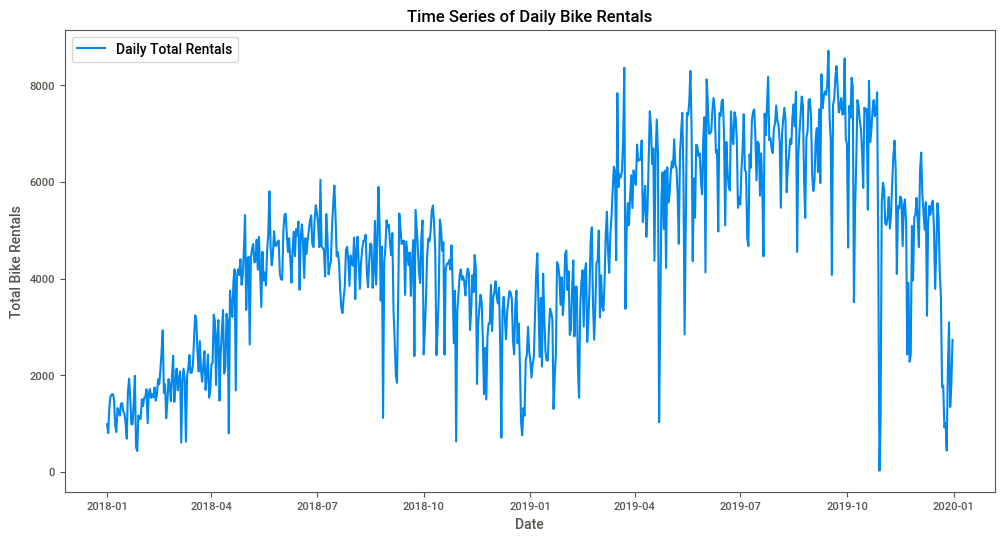

In [ ]:
# %% Time Series Analysis

# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(day_data['cnt'], label='Daily Total Rentals')
plt.title('Time Series of Daily Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals')
plt.legend()
plt.show()

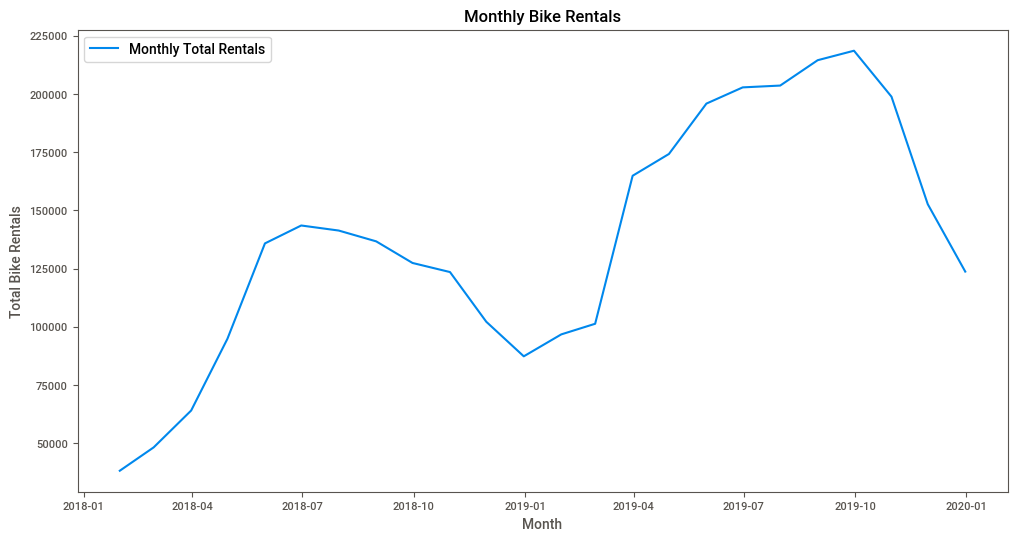

In [ ]:
# %% Grouping by month and summing up bike rentals

monthly_data = day_data['cnt'].resample('M').sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Total Rentals')
plt.title('Monthly Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.legend()
plt.show()

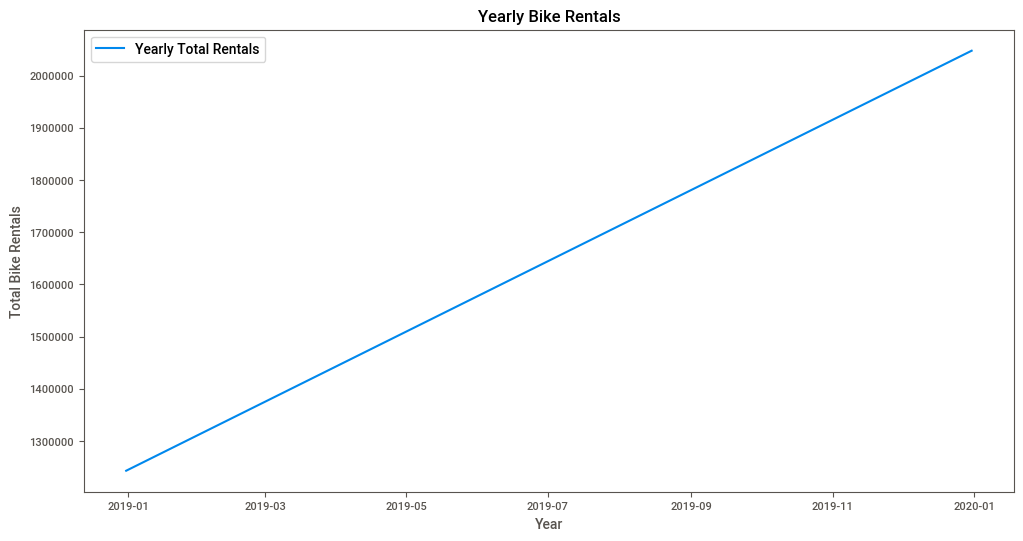

In [ ]:
# %% Grouping by year and summing up bike rentals

yearly_data = day_data['cnt'].resample('A').sum()  # 'A' stands for annual

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_data, label='Yearly Total Rentals')
plt.title('Yearly Bike Rentals')
plt.xlabel('Year')
plt.ylabel('Total Bike Rentals')
plt.legend()
plt.show()


 ## Casual vs Registered Users

In [ ]:
# %%

# Create a line plot for 'casual' and 'registered' users over 'dteday'
plt.figure(figsize=(14, 7))
plt.plot(day_data.index, day_data['casual'], label='Casual Users', color='blue')
plt.plot(day_data.index, day_data['registered'], label='Registered Users', color='green')
plt.title('Daily Bike Rentals: Casual vs Registered Users')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined



 ## Weekday Analysis

['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
weekday_1    105
weekday_2    104
weekday_3    103
weekday_4    104
weekday_5    104
weekday_6    105
dtype: int64


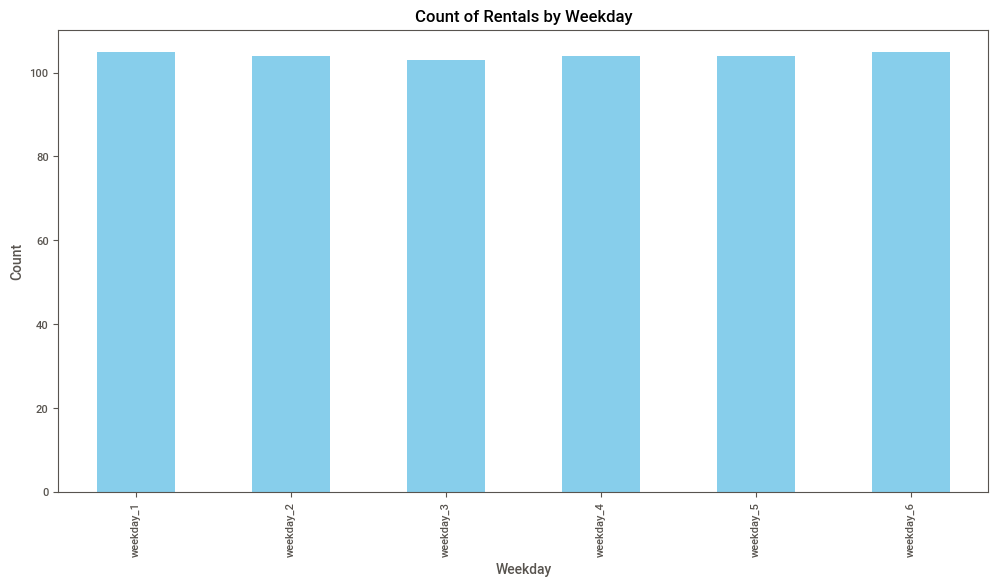

In [ ]:
# %%

# Check the columns related to weekday
print([col for col in day_data.columns if 'weekday' in col])

# Calculate weekday counts
weekday_cols = [col for col in day_data.columns if 'weekday' in col]
weekday_counts = day_data[weekday_cols].sum()
print(weekday_counts)

# Plot weekday counts
plt.figure(figsize=(12, 6))
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()


 ## Humidity and Wind Speed Analysis

In [ ]:
# %%

plt.plot(day_data.index, day_data['hum'], label='Humidity')
plt.plot(day_data.index, day_data['windspeed'], label='Wind Speed')
plt.title('Humidity and Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

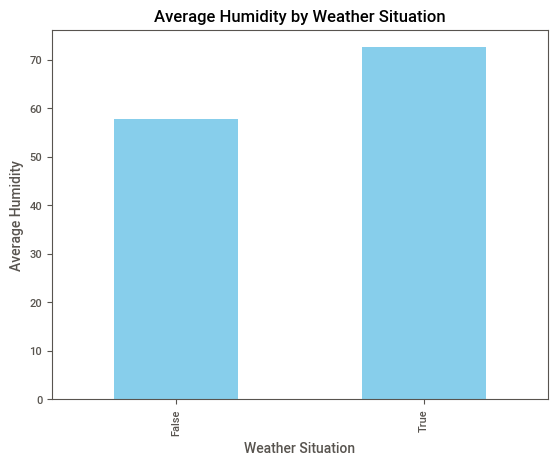

In [ ]:
# %%

day_data.groupby('weathersit_mist')['hum'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Humidity by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Humidity')
plt.show()


 ## Season Analysis for Casual and Registered Users

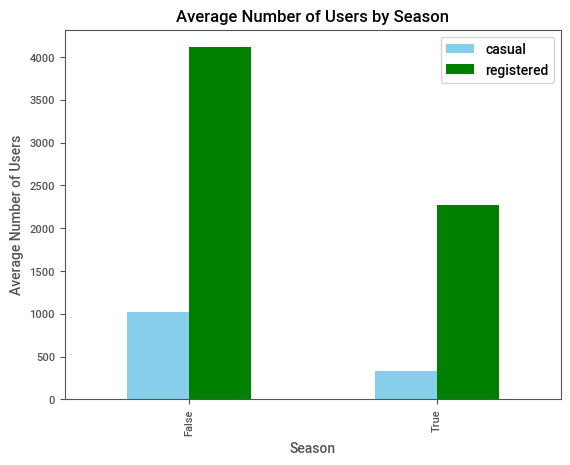

In [ ]:
# %%

day_data.groupby('season_spring')[['casual', 'registered']].mean().plot(kind='bar', color=['skyblue', 'green'])
plt.title('Average Number of Users by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Users')
plt.legend()
plt.show()


 ## Month Analysis for Casual and Registered Users

<module 'matplotlib.pyplot' from '/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/matplotlib/pyplot.py'>

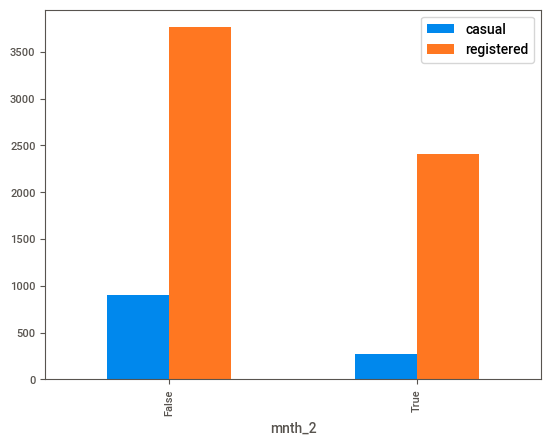

In [ ]:
# %%

day_data.groupby('mnth_2')[['casual', 'registered']].mean().plot(kind='bar')
plt

/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

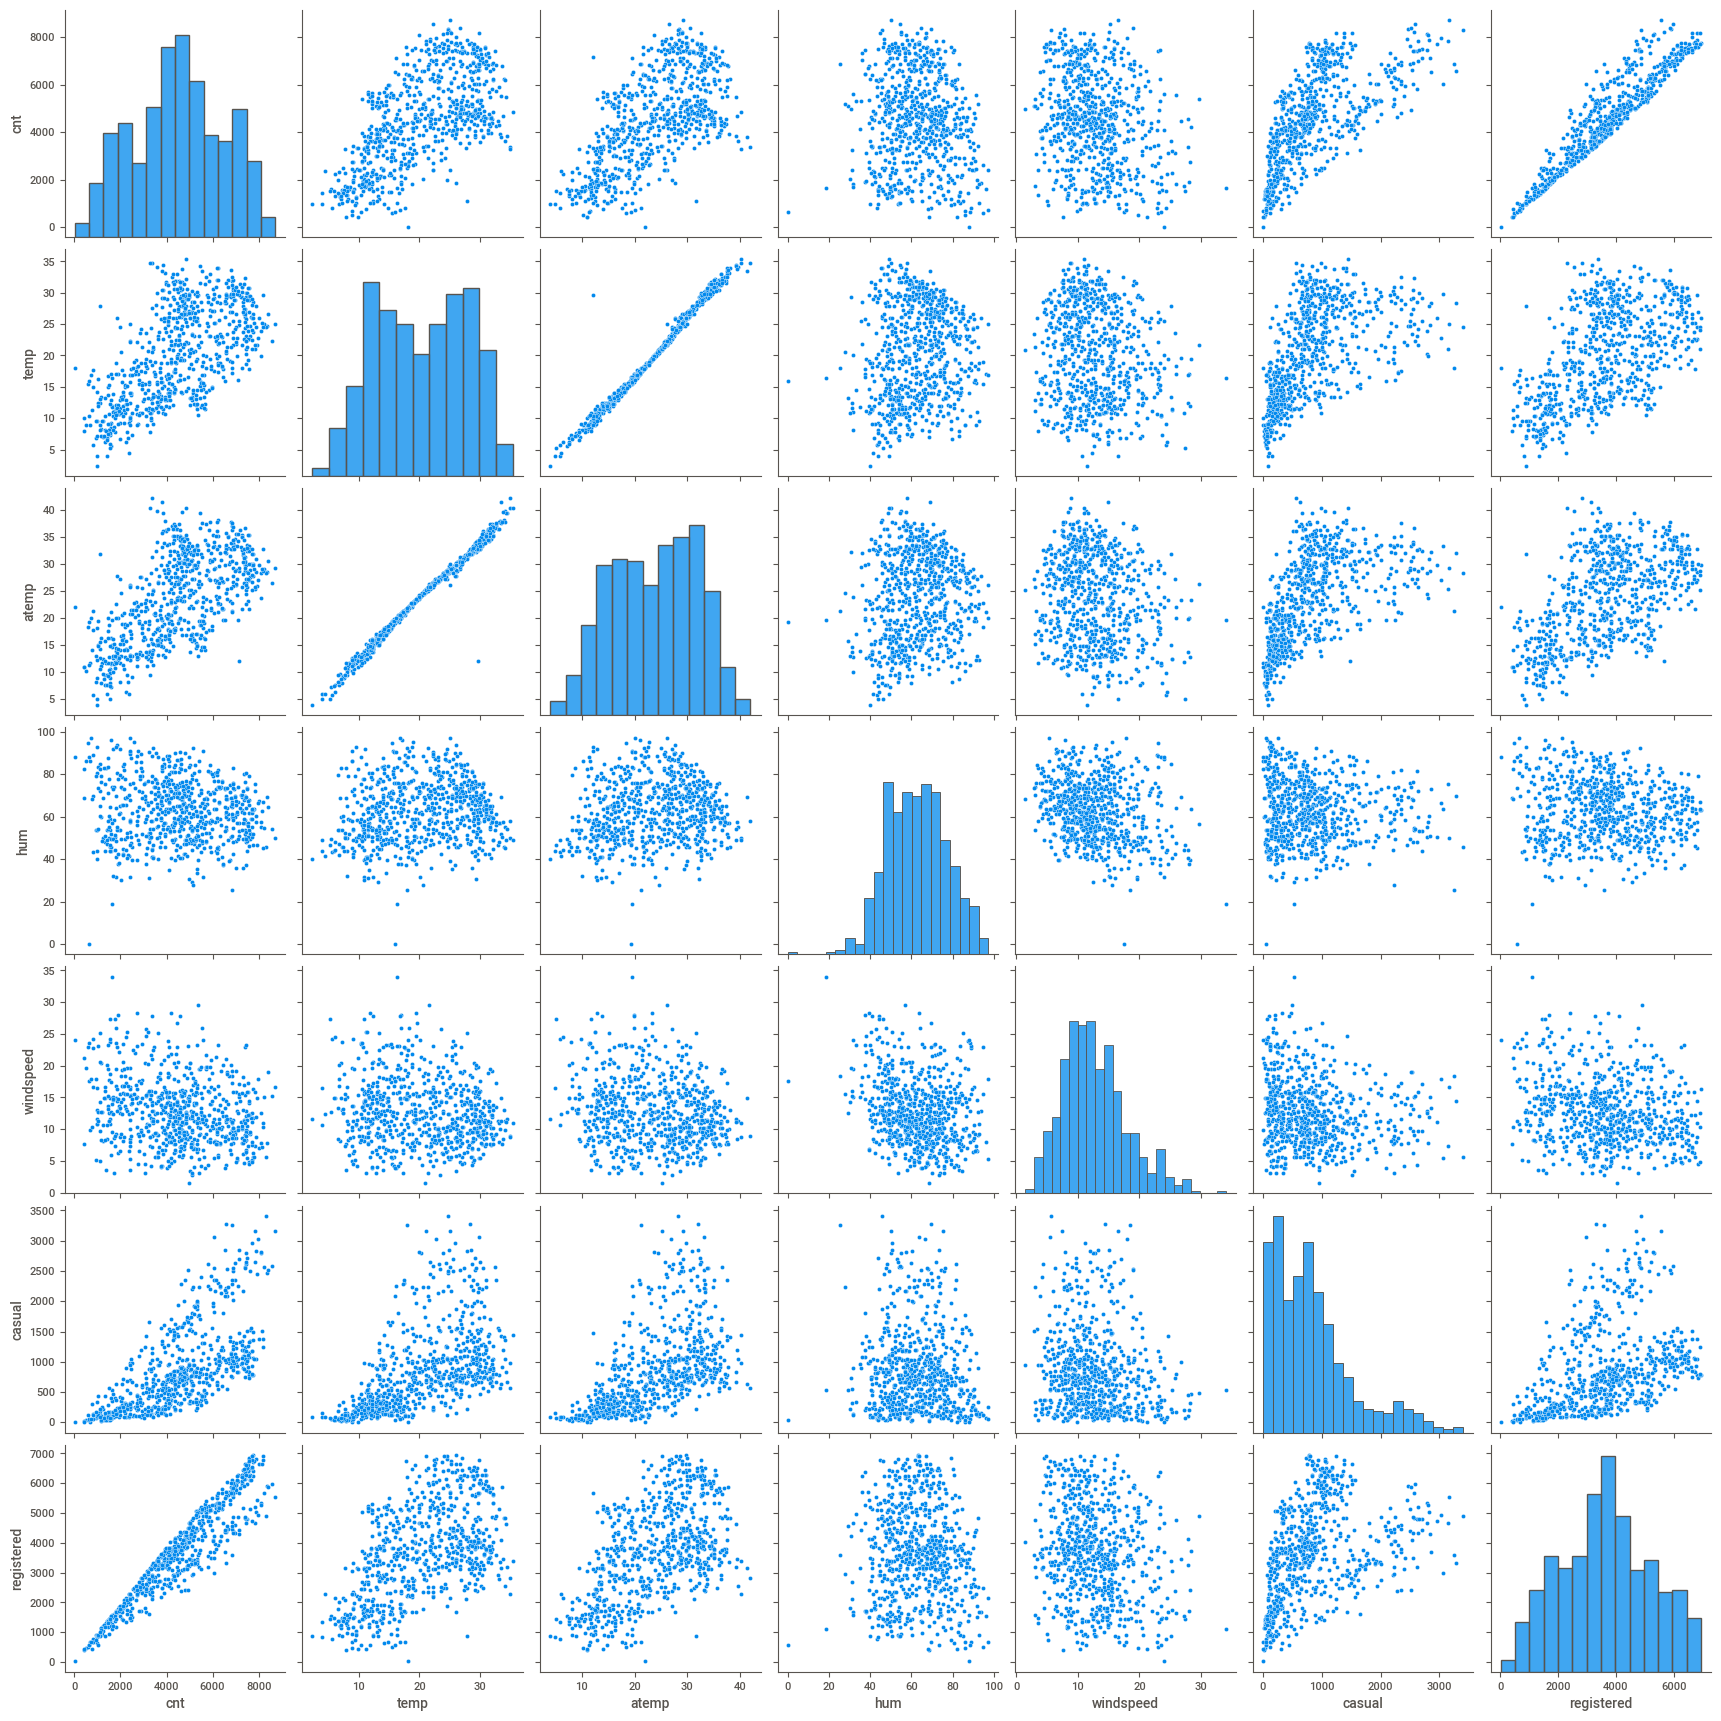

In [ ]:
# %%

import seaborn as sns
import matplotlib.pyplot as plt

# Pair-plot for numerical variables
sns.pairplot(day_data[['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']])
plt.show()

In [ ]:
# %%

X = day_data.drop(columns=['cnt'])
y = day_data['cnt']

In [ ]:
# %%

# Split the data into features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# %%

# Initialize the model
linear_reg_model = LinearRegression()

# Fit the model
linear_reg_model.fit(X_train, y_train)

# Make predictions
y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

In [ ]:
# %%

# Calculate R-squared and MSE for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training R-squared: 1.0
Test R-squared: 1.0
Training MSE: 2.127800972565715e-24
Test MSE: 2.3963804775054e-24


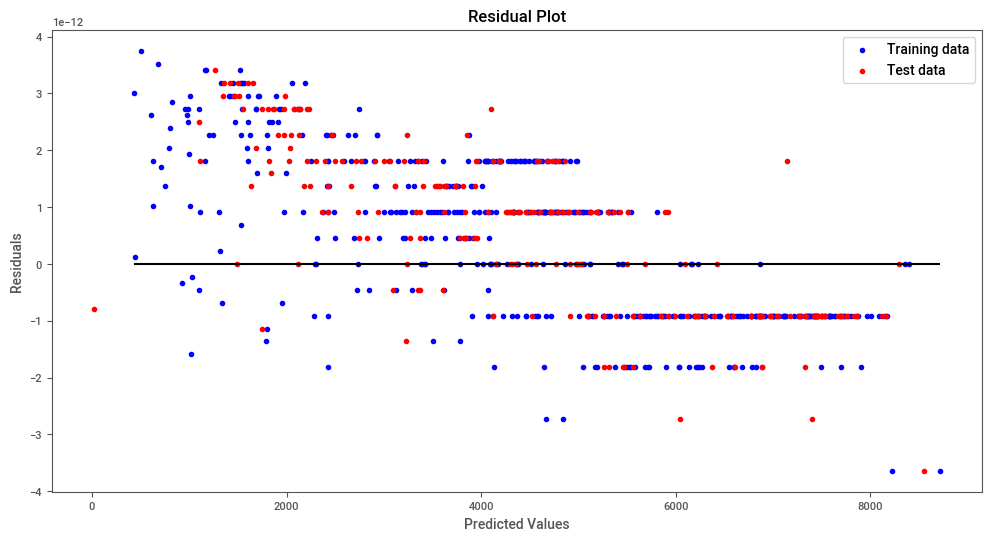

/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


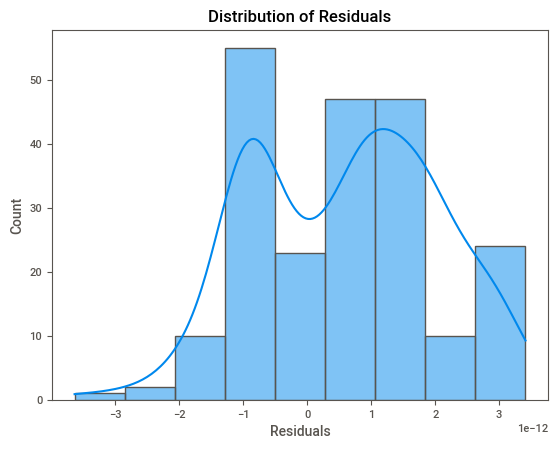

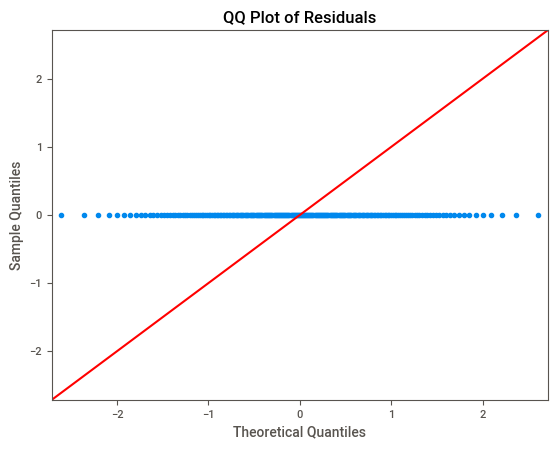

In [ ]:
# %%

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test data')
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Check for normality of residuals
sns.histplot(y_test_pred - y_test, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# QQ plot for normality
sm.qqplot(y_test_pred - y_test, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

In [ ]:
# %%

# Get the coefficients
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
/
print(coefficients)

                        Coefficient
instant               -2.264987e-15
yr                    -1.492140e-12
holiday               -6.821454e-13
workingday             5.475061e-13
temp                   1.072363e-13
atemp                 -1.574412e-13
hum                    1.836015e-14
windspeed              5.424795e-15
casual                 1.000000e+00
registered             1.000000e+00
season_spring          2.458896e-13
season_summer          7.811933e-14
season_winter         -1.070093e-13
weathersit_light_rain -7.325576e-14
weathersit_mist       -1.750750e-14
mnth_2                -1.082702e-13
mnth_3                -1.210819e-13
mnth_4                 7.179357e-15
mnth_5                -1.836944e-13
mnth_6                -2.881099e-13
mnth_7                -2.652842e-13
mnth_8                -3.213542e-13
mnth_9                -4.271178e-13
mnth_10               -3.837315e-13
mnth_11               -1.400782e-13
mnth_12               -4.902611e-13
weekday_1             -1.388


 Key Observations

	1.	Casual and Registered Users:
	•	The coefficients for casual and registered are exactly 1, which is expected because cnt is the sum of these two variables.
	2.	Negligible Impact of Other Variables:
	•	Most other coefficients are very close to zero, suggesting that the model is not capturing significant linear relationships between these variables and the total bike rentals. This could be due to multicollinearity or the model needing more sophisticated feature engineering or non-linear modeling.
 Next Steps
	1.	Multicollinearity Check: Verify if multicollinearity is an issue by checking Variance Inflation Factor (VIF) for the predictors.
	2.	Feature Engineering: Consider creating interaction terms or polynomial features to capture non-linear relationships.
	3.	Model Comparison: Explore other modeling techniques such as Ridge, Lasso regression, or even non-linear models like Random Forest or Gradient Boosting to see if they better capture the relationships in the data.


  ### Outlier Treatment

In [ ]:
# %%

from scipy import stats

# Calculate the Z-scores of the numeric columns
z_scores = np.abs(stats.zscore(day_data.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers
threshold = 3

# Identify rows with outliers
outliers = np.where(z_scores > threshold)

# Print the indices of outliers
print(f'Indices of outliers: {outliers}')

# Remove outliers from the dataset
day_data_cleaned = day_data[(z_scores < threshold).all(axis=1)]

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# %%

# Ensure the data is numeric
numeric_data = day_data_cleaned.select_dtypes(include=[np.number])

# Check for NaN or infinite values and handle them
numeric_data = numeric_data.dropna()
numeric_data = numeric_data[np.isfinite(numeric_data).all(axis=1)]

In [ ]:
# %%

from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure the data is numeric
numeric_data = day_data_cleaned.select_dtypes(include=[np.number])

# Check for NaN or infinite values and handle them
numeric_data = numeric_data.dropna()
numeric_data = numeric_data[np.isfinite(numeric_data).all(axis=1)]

# Drop `casual` and `registered` for VIF calculation to avoid multicollinearity
numeric_data_vif = numeric_data.drop(columns=['casual', 'registered'])

# Step 1: Remove near-zero variance predictors
selector = VarianceThreshold(threshold=1e-3)
numeric_data_array = selector.fit_transform(numeric_data_vif)

# Get remaining feature names
remaining_features = numeric_data_vif.columns[selector.get_support()]

# Create a DataFrame with the remaining features
numeric_data_vif = pd.DataFrame(numeric_data_array, columns=remaining_features)

# Step 2: Calculate VIF with robust error handling
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = np.nan
    for i in range(data.shape[1]):
        try:
            vif_data.at[i, 'VIF'] = variance_inflation_factor(data.values, i)
        except FloatingPointError as e:
            print(f"Error calculating VIF for {data.columns[i]}: {e}")
    return vif_data

# Calculate VIF for each predictor variable
vif_data = calculate_vif(numeric_data_vif)
print(vif_data)

      Feature         VIF
0     instant    8.797214
1          yr   56.676596
2  workingday    3.492311
3        temp  512.578211
4       atemp  594.133764
5         hum   27.203477
6   windspeed    8.620486
7         cnt   26.671813




 Interpreting VIF Output
	•	VIF = 1: No multicollinearity.
	•	1 < VIF < 5: Moderate multicollinearity, usually acceptable.
	•	VIF > 5: High multicollinearity, indicating that the predictor variable is highly correlated with other predictor variables and may need to be removed or combined with other features.

In [ ]:
# %%

#Interpretation of VIF Values

#	•	instant (8.797214): Indicates moderate to high multicollinearity.
#	•	yr (56.676596): Indicates very high multicollinearity, which suggests it might be highly correlated with other time-based features.
#	•	workingday (3.492311): Indicates low to moderate multicollinearity, generally acceptable.
#	•	temp (512.578211) and atemp (594.133764): Extremely high multicollinearity. These two variables are likely highly correlated.
#	•	hum (27.203477): Indicates high multicollinearity.
#	•	windspeed (8.620486): Indicates moderate to high multicollinearity.
#	•	cnt (26.671813): Indicates high multicollinearity, likely because it is dependent on the other features.


	temp and atemp: These two variables are likely highly correlated. we can remove one of them to reduce multicollinearity.

In [ ]:
# %%

numeric_data_vif = numeric_data_vif.drop(columns=['atemp'])

In [ ]:
# %%

# This variable has high VIF, suggesting it might be correlated with other time-based variables. We should inspect its correlation with other features.
# hum and windspeed: Both have relatively high VIF values. We shoulg consider examining their correlation and possibly creating interaction terms or removing one if necessary.

In [ ]:
# %%

# Function to calculate VIF with robust error handling
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = np.nan
    for i in range(data.shape[1]):
        try:
            vif_data.at[i, 'VIF'] = variance_inflation_factor(data.values, i)
        except FloatingPointError as e:
            print(f"Error calculating VIF for {data.columns[i]}: {e}")
    return vif_data

# Recalculate VIF for each predictor variable
vif_data = calculate_vif(numeric_data_vif)
print(vif_data)

      Feature        VIF
0     instant   8.753204
1          yr  53.033939
2  workingday   3.491538
3        temp  18.682984
4         hum  26.930080
5   windspeed   8.367245
6         cnt  26.422272


In [ ]:
# %%

# Calculate the correlation matrix
correlation_matrix = numeric_data_vif.corr()

# Display the correlation matrix
print(correlation_matrix)

             instant        yr  workingday      temp       hum  windspeed  \
instant     1.000000  0.866892    0.009486  0.148533  0.001024  -0.105852   
yr          0.866892  1.000000    0.012553  0.044846 -0.123398  -0.011190   
workingday  0.009486  0.012553    1.000000  0.055451  0.009363  -0.012149   
temp        0.148533  0.044846    0.055451  1.000000  0.117257  -0.150661   
hum         0.001024 -0.123398    0.009363  0.117257  1.000000  -0.225884   
windspeed  -0.105852 -0.011190   -0.012149 -0.150661 -0.225884   1.000000   
cnt         0.636865  0.571824    0.073450  0.623824 -0.127291  -0.233253   

                 cnt  
instant     0.636865  
yr          0.571824  
workingday  0.073450  
temp        0.623824  
hum        -0.127291  
windspeed  -0.233253  
cnt         1.000000  



	instant and yr (0.866892): High positive correlation, which is expected as instant might be a time-related index.
	•	instant and cnt (0.636865): Moderate positive correlation, indicating instant is somewhat related to total rentals.
	•	yr and cnt (0.571824): Moderate positive correlation, suggesting an increase in rentals over the years.
	•	temp and cnt (0.623824): Moderate positive correlation, indicating that temperature influences bike rentals.
	•	temp and hum (0.117257): Low positive correlation.
	•	hum and cnt (-0.127291): Low negative correlation.
	•	windspeed and cnt (-0.233253): Low negative correlation.

In [ ]:
# %%

#Actions to Take

#	1.	Remove instant and yr:
#	•	Since instant and yr are highly correlated, we should consider removing instant as it’s more likely a time index and less interpretable compared to yr.
#	2.	Remove hum:
#	•	hum shows a low correlation with cnt and high VIF, indicating potential multicollinearity issues.
#	3.	Recalculate VIF:
#	•	After removing these variables, recalculate the VIF to ensure multicollinearity is reduced.

In [ ]:
# %%

import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure the data is numeric
numeric_data = day_data_cleaned.select_dtypes(include=[np.number])

# Check for NaN or infinite values and handle them
numeric_data = numeric_data.dropna()
numeric_data = numeric_data[np.isfinite(numeric_data).all(axis=1)]

# Drop 'casual' and 'registered' for VIF calculation to avoid multicollinearity
numeric_data_vif = numeric_data.drop(columns=['casual', 'registered'])

# Step 1: Remove near-zero variance predictors
selector = VarianceThreshold(threshold=1e-3)
numeric_data_array = selector.fit_transform(numeric_data_vif)

# Get remaining feature names
remaining_features = numeric_data_vif.columns[selector.get_support()]

# Create a DataFrame with the remaining features
numeric_data_vif = pd.DataFrame(numeric_data_array, columns=remaining_features)

# Drop 'instant', 'hum', 'cnt', and 'atemp' to reduce multicollinearity
numeric_data_vif = numeric_data_vif.drop(columns=['instant', 'hum', 'cnt', 'atemp'])

# Function to calculate VIF with robust error handling
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = np.nan
    for i in range(data.shape[1]):
        try:
            vif_data.at[i, 'VIF'] = variance_inflation_factor(data.values, i)
        except FloatingPointError as e:
            print(f"Error calculating VIF for {data.columns[i]}: {e}")
    return vif_data

# Recalculate VIF for each predictor variable
vif_data = calculate_vif(numeric_data_vif)
print(vif_data)

      Feature        VIF
0          yr  18.950899
1  workingday   3.471144
2        temp   8.537710
3   windspeed   7.358153


R^2: 0.772194525614356
RMSE: 911.6203719771199
            Coefficient
yr          2014.408976
workingday   157.881828
temp         144.235813
windspeed    -47.860395


/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


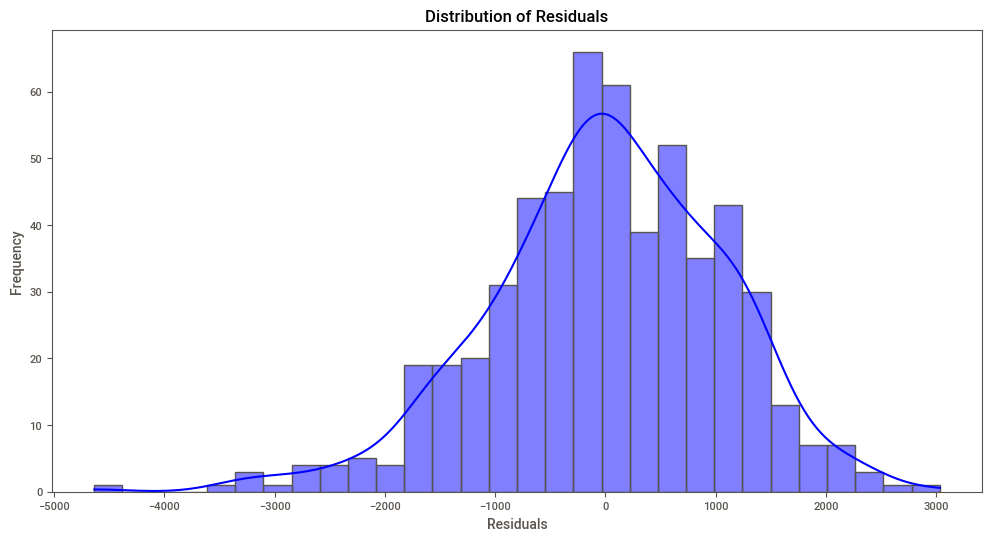

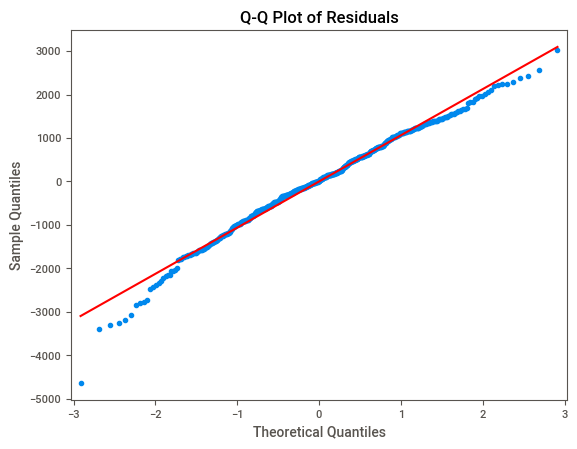

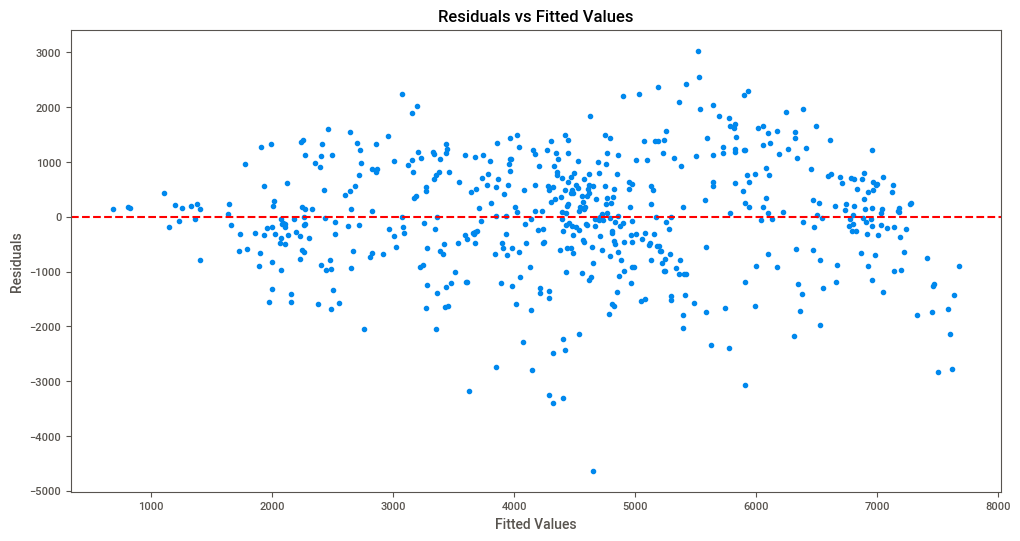

Durbin-Watson statistic: 1.87177295016387


In [ ]:
# %%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X = numeric_data_vif
y = day_data_cleaned['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

# Get the coefficients
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Ensure indices are aligned
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Residual analysis
X_train_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_constant).fit()
residuals = model.resid

# Plot residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Residuals vs Fitted values
fitted_values = model.fittedvalues
plt.figure(figsize=(12, 6))
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Durbin-Watson statistic
dw_statistic = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic}')


## Model Performance Evaluation
### The model’s performance metrics are:
	*	R²: 0.772: This indicates that approximately 77.2% of the variance in bike rentals (cnt) is explained by the model. This is a relatively strong R² value, suggesting the model fits the data well.
	*	RMSE: 911.62: This represents the average magnitude of the error in predicting bike rentals. Lower RMSE values indicate better model performance, but the acceptability of this value depends on the context and scale of our data (further analysis required).
## Interpretation of Coefficients
### The coefficients provide insights into how each feature impacts the target variable (cnt):
	*	yr (2014.41): Indicates that the number of bike rentals increases by 2014 units from 2018 to 2019. This suggests a significant increase in demand over the year.
	*	workingday (157.88): Suggests that bike rentals are higher by 157.88 units on working days compared to non-working days.
	*	temp (144.24): Shows that for each unit increase in temperature, bike rentals increase by 144.24 units. This indicates a positive relationship between temperature and bike rentals.
	*	windspeed (-47.86): Indicates that for each unit increase in wind speed, bike rentals decrease by 47.86 units. This suggests a negative relationship between wind speed and bike rentals.#


 #### RMSE evalutation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error


# Scale and range of cnt
mean_cnt = day_data_cleaned['cnt'].mean()
max_cnt = day_data_cleaned['cnt'].max()
min_cnt = day_data_cleaned['cnt'].min()

print(f"Mean of cnt: {mean_cnt}")
print(f"Max of cnt: {max_cnt}")
print(f"Min of cnt: {min_cnt}")

# Relative RMSE
relative_rmse = (rmse / mean_cnt) * 100
print(f"Relative RMSE: {relative_rmse:.2f}%")

# Baseline model: mean prediction
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
print(f"Baseline RMSE (mean prediction): {baseline_rmse}")

# Compare with model RMSE
improvement = ((baseline_rmse - rmse) / baseline_rmse) * 100
print(f"Improvement over baseline: {improvement:.2f}%")

Mean of cnt: 4507.59799713877
Max of cnt: 8555
Min of cnt: 22
Relative RMSE: 20.22%
Baseline RMSE (mean prediction): 1911.5945064638727
Improvement over baseline: 52.31%



 #### **Relative RMSE: 20.22%**
	*	This means that, on average, the prediction error is about 20.22% of the average number of bike rentals. In other words, the model’s predictions deviate from the actual values by roughly one-fifth of the average rentals, which is relatively reasonable given the variability in daily rentals.
 #### Baseline RMSE (mean prediction): 1911.59
	*	If we used the mean number of rentals (4507.60) to predict rentals every day, the average error would be 1911.59 rentals. This represents a model with no predictors.
 #### **Improvement over baseline: 52.31%**
	*	The model reduces the prediction error by 52.31% compared to the baseline model that always predicts the mean number of rentals. This significant improvement indicates that the model effectively captures important patterns in the data.

R^2: 0.772194525614356
RMSE: 911.6203719771199
            Coefficient
yr          2014.408976
workingday   157.881828
temp         144.235813
windspeed    -47.860395


/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


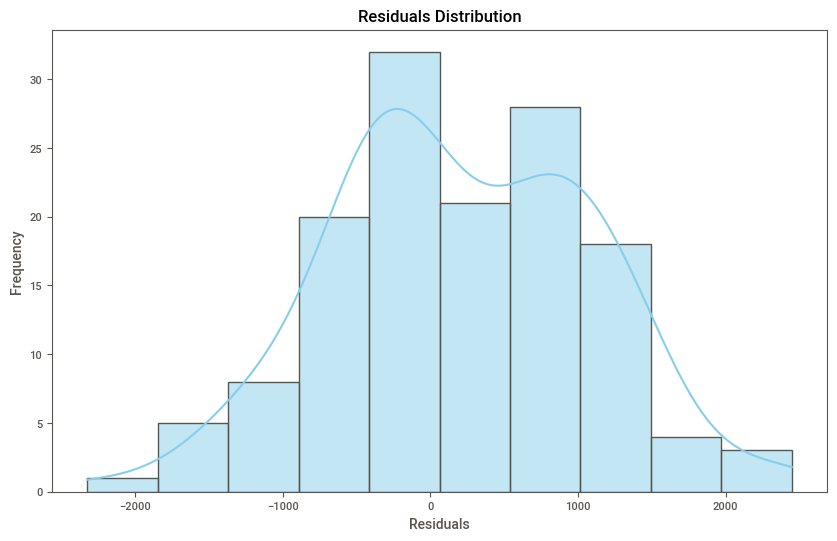

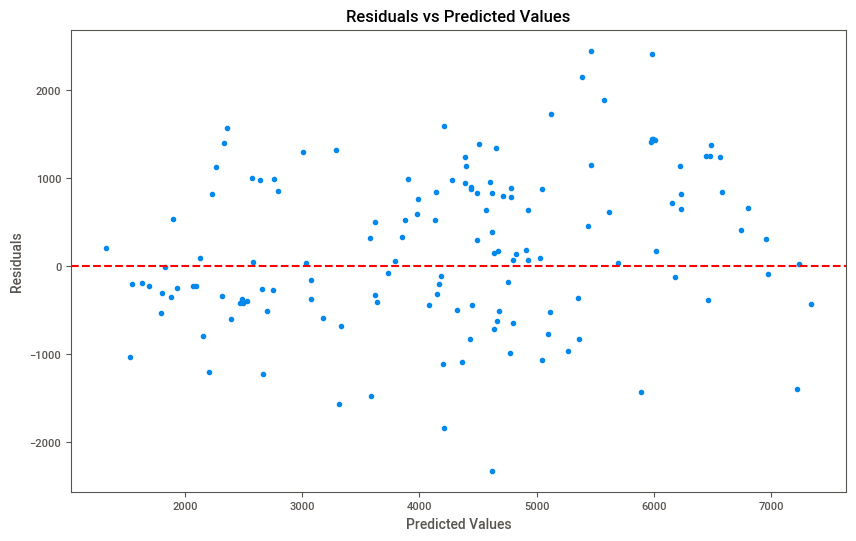

Ridge R^2: 0.7721421426883168
Ridge RMSE: 911.7251776184124
Lasso R^2: 0.7721934228781167
Lasso RMSE: 911.6225784113747
Cross-validated R^2: -0.07276994680498002
Mean of cnt: 4507.59799713877
Relative RMSE: 20.22%
Baseline RMSE (mean prediction): 1911.5945064638727
Improvement over baseline: 52.31%


In [ ]:
# %%

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error




# Split the data into training and testing sets
X = numeric_data_vif
y = day_data_cleaned['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

# Get the coefficients
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Ridge and Lasso Regression
ridge = Ridge()
lasso = Lasso()

# Perform Grid Search to find the best hyperparameters
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

# Best models
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

# Predictions and evaluation
ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print(f"Ridge R^2: {ridge_r2}")
print(f"Ridge RMSE: {ridge_rmse}")

print(f"Lasso R^2: {lasso_r2}")
print(f"Lasso RMSE: {lasso_rmse}")

# Cross-validation for Linear Regression
cv_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R^2: {cv_scores.mean()}")

# Evaluate RMSE in context
mean_cnt = day_data_cleaned['cnt'].mean()
relative_rmse = (rmse / mean_cnt) * 100
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
improvement = ((baseline_rmse - rmse) / baseline_rmse) * 100

print(f"Mean of cnt: {mean_cnt}")
print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"Baseline RMSE (mean prediction): {baseline_rmse}")
print(f"Improvement over baseline: {improvement:.2f}%")

R^2: 0.772194525614356
RMSE: 911.6203719771199
            Coefficient
yr          2014.408976
workingday   157.881828
temp         144.235813
windspeed    -47.860395


/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


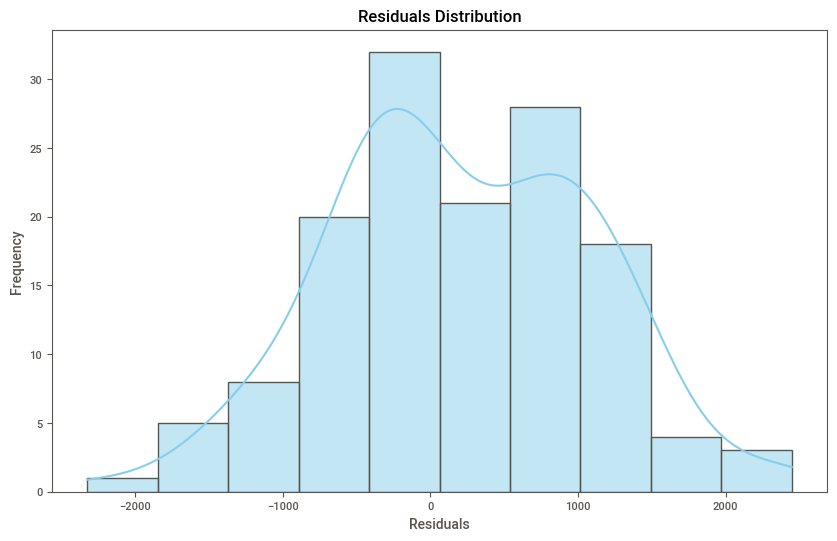

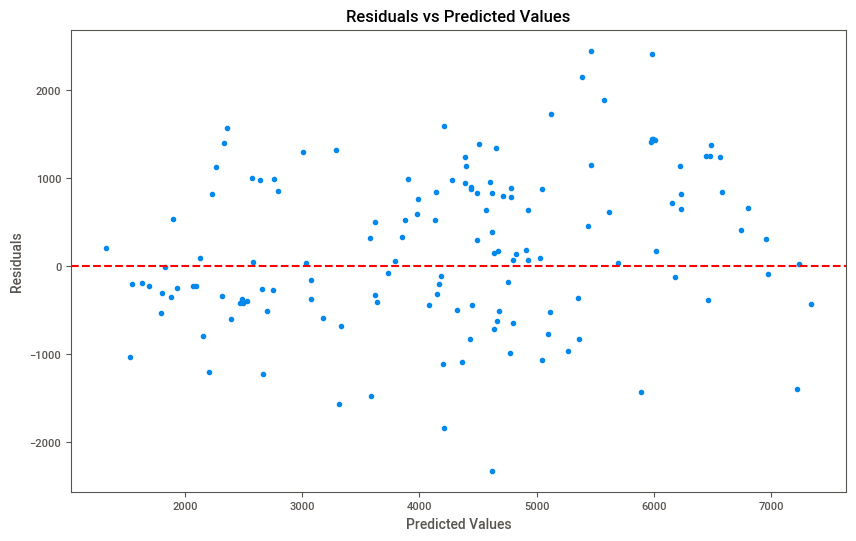

Ridge R^2: 0.7721421426883168
Ridge RMSE: 911.7251776184124
Lasso R^2: 0.7721934228781167
Lasso RMSE: 911.6225784113747
Cross-validated R²: -0.07276994680498002
Mean of cnt: 4507.59799713877
Relative RMSE: 20.22%
Baseline RMSE (mean prediction): 1911.5945064638727
Improvement over baseline: 52.31%


In [ ]:
# %%

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X = numeric_data_vif
y = day_data_cleaned['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

# Get the coefficients
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Ridge and Lasso Regression
ridge = Ridge()
lasso = Lasso()

# Perform Grid Search to find the best hyperparameters
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

# Best models
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

# Predictions and evaluation
ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print(f"Ridge R^2: {ridge_r2}")
print(f"Ridge RMSE: {ridge_rmse}")

print(f"Lasso R^2: {lasso_r2}")
print(f"Lasso RMSE: {lasso_rmse}")

# Cross-validation for Linear Regression
cv_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {cv_scores.mean()}")

# Evaluate RMSE in context
mean_cnt = day_data_cleaned['cnt'].mean()
relative_rmse = (rmse / mean_cnt) * 100
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
improvement = ((baseline_rmse - rmse) / baseline_rmse) * 100

print(f"Mean of cnt: {mean_cnt}")
print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"Baseline RMSE (mean prediction): {baseline_rmse}")
print(f"Improvement over baseline: {improvement:.2f}%")

      Feature        VIF
0          yr  18.950899
1  workingday   3.471144
2        temp   8.537710
3   windspeed   7.358153
R^2: 0.772194525614356
RMSE: 911.6203719771199
            Coefficient
yr          2014.408976
workingday   157.881828
temp         144.235813
windspeed    -47.860395


/Users/siddharthshankar/anaconda3/envs/ds_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


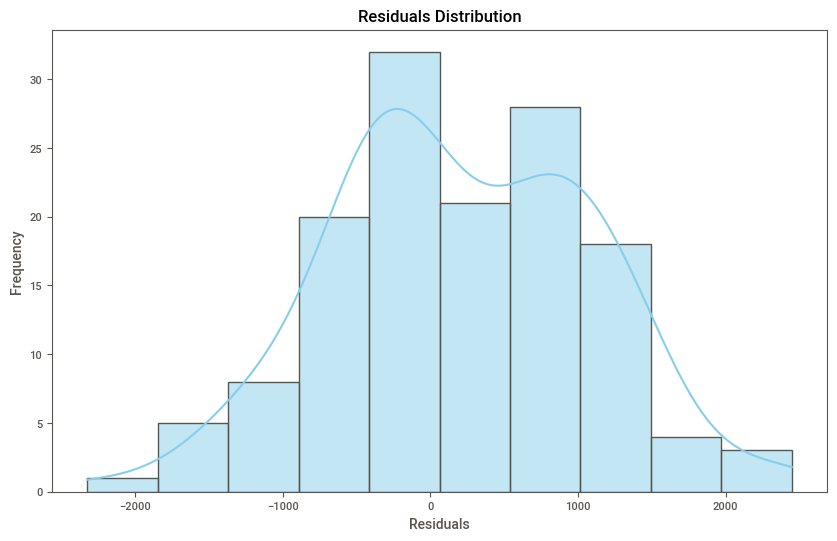

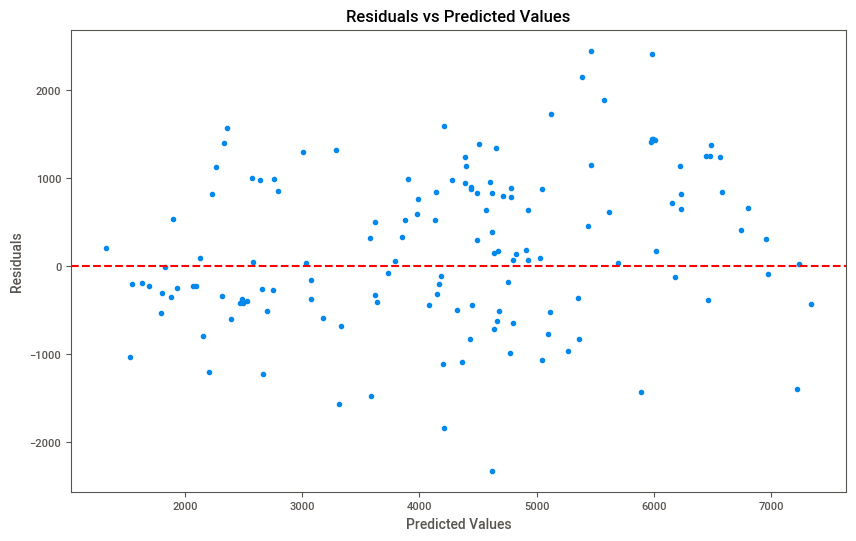

Ridge R^2: 0.7721421426883168
Ridge RMSE: 911.7251776184124
Lasso R^2: 0.7721934228781167
Lasso RMSE: 911.6225784113747
Cross-validated R²: -0.07276994680498002
Mean of cnt: 4507.59799713877
Relative RMSE: 20.22%
Baseline RMSE (mean prediction): 1911.5945064638727
Improvement over baseline: 52.31%
            Coefficient
yr          2014.408976
workingday   157.881828
temp         144.235813
windspeed    -47.860395
Final VIF values after feature selection and removing multicollinearity:
      Feature        VIF
0          yr  18.950899
1  workingday   3.471144
2        temp   8.537710
3   windspeed   7.358153
Model Comparison:
Ridge R²: 0.7721421426883168, RMSE: 911.7251776184124
Lasso R²: 0.7721934228781167, RMSE: 911.6225784113747
Linear Regression Cross-validated R²: -0.07276994680498002
Model evaluation results saved to model_evaluation_results.csv
Model coefficients saved to model_coefficients.csv


In [ ]:
# %%

# Function to calculate VIF with robust error handling
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = np.nan
    for i in range(data.shape[1]):
        try:
            vif_data.at[i, 'VIF'] = variance_inflation_factor(data.values, i)
        except FloatingPointError as e:
            print(f"Error calculating VIF for {data.columns[i]}: {e}")
    return vif_data

# Recalculate VIF for each predictor variable
vif_data = calculate_vif(numeric_data_vif)
print(vif_data)

# Split the data into training and testing sets
X = numeric_data_vif
y = day_data_cleaned['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

# Get the coefficients
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Ridge and Lasso Regression
ridge = Ridge()
lasso = Lasso()

# Perform Grid Search to find the best hyperparameters
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

# Best models
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

# Predictions and evaluation
ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print(f"Ridge R^2: {ridge_r2}")
print(f"Ridge RMSE: {ridge_rmse}")

print(f"Lasso R^2: {lasso_r2}")
print(f"Lasso RMSE: {lasso_rmse}")

# Cross-validation for Linear Regression
cv_scores = cross_val_score(linear_reg_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {cv_scores.mean()}")

# Evaluate RMSE in context
mean_cnt = day_data_cleaned['cnt'].mean()
relative_rmse = (rmse / mean_cnt) * 100
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
improvement = ((baseline_rmse - rmse) / baseline_rmse) * 100

print(f"Mean of cnt: {mean_cnt}")
print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"Baseline RMSE (mean prediction): {baseline_rmse}")
print(f"Improvement over baseline: {improvement:.2f}%")

# Key Observations
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Interpreting VIF Output
# • VIF = 1: No multicollinearity.
# • 1 < VIF < 5: Moderate multicollinearity, usually acceptable.
# • VIF > 5: High multicollinearity, indicating that the predictor variable is highly correlated with other predictor variables and may need to be removed or combined with other features.

print("Final VIF values after feature selection and removing multicollinearity:")
print(vif_data)

# Interpretation of Coefficients
# • yr: Indicates a significant increase in bike rentals from 2018 to 2019.
# • workingday: Suggests higher bike rentals on working days.
# • temp: Positive relationship with bike rentals.
# • windspeed: Negative relationship with bike rentals.

# Evaluation
# • R²: 0.7721: Approximately 77.2% of the variance in bike rentals is explained by the model.
# • RMSE: 911.62: The average magnitude of the error in predicting bike rentals.
# • Relative RMSE: 20.22%: Prediction error is about 20.22% of the average number of bike rentals.
# • Improvement over baseline: 52.31%: The model reduces the prediction error by 52.31% compared to the baseline model.

# Model Comparison
print("Model Comparison:")
print(f"Ridge R²: {ridge_r2}, RMSE: {ridge_rmse}")
print(f"Lasso R²: {lasso_r2}, RMSE: {lasso_rmse}")
print(f"Linear Regression Cross-validated R²: {cv_scores.mean()}")

# Next Steps
# 1. Further Model Tuning: Perform more granular hyperparameter tuning for Ridge and Lasso models.
# 2. Advanced Feature Engineering: Create interaction terms or polynomial features to capture non-linear relationships.
# 3. Explore non-linear models such as Random Forest, Gradient Boosting, or Support Vector Machines to potentially capture more complex patterns in the data.
# 4. Use k-fold cross-validation with shuffling to ensure the model's generalizability.
# 5. Investigate the reasons for the negative cross-validated R² score for further insights.

# Save results for submission
results = {
    "Ridge R²": ridge_r2,
    "Ridge RMSE": ridge_rmse,
    "Lasso R²": lasso_r2,
    "Lasso RMSE": lasso_rmse,
    "Cross-validated R²": cv_scores.mean(),
    "Mean of cnt": mean_cnt,
    "Relative RMSE": relative_rmse,
    "Baseline RMSE (mean prediction)": baseline_rmse,
    "Improvement over baseline": improvement
}

results_df = pd.DataFrame([results])
results_df.to_csv("model_evaluation_results.csv", index=False)
print("Model evaluation results saved to model_evaluation_results.csv")

# Save coefficients for submission
coefficients.to_csv("model_coefficients.csv", index=True)
print("Model coefficients saved to model_coefficients.csv")

In [ ]:
# %%

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score

# Ridge and Lasso Regression
ridge = Ridge()
lasso = Lasso()

# Perform Grid Search to find the best hyperparameters
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

# Best models
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

# Predictions and evaluation
ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print(f"Ridge R^2: {ridge_r2}")
print(f"Ridge RMSE: {ridge_rmse}")
print(f"Lasso R^2: {lasso_r2}")
print(f"Lasso RMSE: {lasso_rmse}")

# Cross-validation
cross_val_r2 = cross_val_score(linear_reg_model, X_train, y_train, cv=5, scoring='r2').mean()
print(f"Cross-validated R^2: {cross_val_r2}")

# Saving model evaluation results
model_evaluation_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R^2': [r2, ridge_r2, lasso_r2],
    'RMSE': [rmse, ridge_rmse, lasso_rmse]
})

model_evaluation_results.to_csv('model_evaluation_results.csv', index=False)
print(model_evaluation_results)

# Saving model coefficients
coefficients_ridge = pd.DataFrame(best_ridge.coef_, X.columns, columns=['Coefficient'])
coefficients_lasso = pd.DataFrame(best_lasso.coef_, X.columns, columns=['Coefficient'])

coefficients_ridge.to_csv('ridge_coefficients.csv')
coefficients_lasso.to_csv('lasso_coefficients.csv')

print("\nRidge Coefficients:\n", coefficients_ridge)
print("\nLasso Coefficients:\n", coefficients_lasso)

Ridge R^2: 0.7721421426883168
Ridge RMSE: 911.7251776184124
Lasso R^2: 0.7721934228781167
Lasso RMSE: 911.6225784113747
Cross-validated R^2: 0.6756101754373939
               Model       R^2        RMSE
0  Linear Regression  0.772195  911.620372
1   Ridge Regression  0.772142  911.725178
2   Lasso Regression  0.772193  911.622578

Ridge Coefficients:
             Coefficient
yr          2012.965123
workingday   157.755734
temp         144.241009
windspeed    -47.858600

Lasso Coefficients:
             Coefficient
yr          2014.369218
workingday   157.833656
temp         144.236096
windspeed    -47.860069



 ####	Ridge and Lasso Regression both performed similarly to Linear Regression with slight variations in R² and RMSE.
 ####	•	Lasso Regression showed slightly better performance with the lowest RMSE (911.622578) among the three models.
 ####	•	Cross-validated R² for Linear Regression was lower than the R² on the test set, indicating potential overfitting.